In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read data 

In [2]:
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration'
           , 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location'
           , 'wheel_base', 'length', 'width', 'height', 'curb-weight', 'engine_type'
           , 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke'
           , 'compression-ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'
           , 'price']
cars = pd.read_csv('data/imports-85.data', header=None)
cars.columns = columns
cars

symboling normalized_losses         make fuel_type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine_size  fuel_system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak_rpm city_mpg highway_mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

**1. Данные можно использовать для решения следующих задач:**

- Определить normalized_losses (относительный средний размер выплаты ущерба на год застрахованного автомобиля), как задача регрессии.
- Определить price (цена автомобиля), как задача регрессии.
- Провести binning столбца price на low, medium, and high и свести к задаче классификации.
- Определить city_mpg (расход топлива в городе, miles per gallon) или highway-mpg (расход топлива на шоссе, miles per gallon), как задача регрессии.
- Определить symboling (страховой риск), как задача классификации.

**Я буду решать задачу по определению цены автомобиля**

# Clean data 

Проверим данные на наличие пропусков.

In [3]:
cars.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb-weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

В данных как будто бы отсутствуют пропуски, но при внимательном рассмотрении видно, что в данных присутствуют знаки "?".
Заменим вопросы на Nan.

In [4]:
cars.replace('?', np.nan, inplace=True)

In [5]:
cars.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb-weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Стало видно, что пропуски все таки присутствуют.

Столбец normalized_losses разумнее всего исколючить из датасета, у нас слишком мало данных, чтобы оставлять столько пропусков.

Пропуск в столбце num_of_doors(категориальные данные) имеет смысл заменить на чаще всего встречающееся значение (моду).

Все остальные столбцы с пропусками являются количественными и их для упрощения можно заменить средними.

Проверим правильность типов данных.

In [6]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Видно, что у столбцов normalized_losses, bore, stroke, horsepower, peak_rpm, price тип определен, как object, хотя по описанию они int или float.

In [7]:
cars[['normalized_losses', 'horsepower', 'peak_rpm', 'price']] = cars[['normalized_losses', 'horsepower', 'peak_rpm', 'price']].applymap(lambda x: int(x) if x is not np.NaN else x)

In [8]:
cars[['bore', 'stroke']] = cars[['bore', 'stroke']].applymap(lambda x: float(x) if x is not np.NaN else x)

In [9]:
cars['symboling'] = cars['symboling'].astype('str')

In [10]:
cars.dtypes

symboling             object
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Так как мы определяем цену, то лучше удалить пропущенные строки столбца price.

In [11]:
cars = cars[cars.price.notna()]

In [12]:
cars.groupby('num_of_doors').count().make

num_of_doors
four    113
two      86
Name: make, dtype: int64

In [13]:
mode_num_of_doors = 'four'

In [14]:
mean_bore = cars.bore.mean()
mean_stroke = cars.stroke.mean()
mean_hp = int(cars.horsepower.mean())
mean_peak_rpm = int(cars.peak_rpm.mean())

In [15]:
cars.num_of_doors.fillna(mode_num_of_doors, inplace=True)
cars.bore.fillna(mean_bore, inplace=True)
cars.stroke.fillna(mean_stroke, inplace=True)
cars.horsepower.fillna(mean_hp, inplace=True)
cars.peak_rpm.fillna(mean_peak_rpm, inplace=True)

/home/arcry/envmetr/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Столбец normalized_losses удалим, так как в нем слишком много пропусков для такого количества данных.

In [16]:
cars.drop(columns=['normalized_losses'], inplace=True)

/home/arcry/envmetr/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
cars.isna().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb-weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# EDA

Посмотрим корреляции количественных данных.

In [105]:
cars_num = cars.select_dtypes(include=['float64,', 'int64'])
cars_num.head()

wheel_base  length  width  height  curb-weight  engine_size  bore  stroke  \
0        88.6   168.8   64.1    48.8         2548          130  3.47    2.68   
1        88.6   168.8   64.1    48.8         2548          130  3.47    2.68   
2        94.5   171.2   65.5    52.4         2823          152  2.68    3.47   
3        99.8   176.6   66.2    54.3         2337          109  3.19    3.40   
4        99.4   176.6   66.4    54.3         2824          136  3.19    3.40   

   compression-ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  
0                9.0       111.0    5000.0        21           27  13495.0  
1                9.0       111.0    5000.0        21           27  16500.0  
2                9.0       154.0    5000.0        19           26  16500.0  
3               10.0       102.0    5500.0        24           30  13950.0  
4                8.0       115.0    5500.0        18           22  17450.0

<Figure size 1440x1440 with 0 Axes>

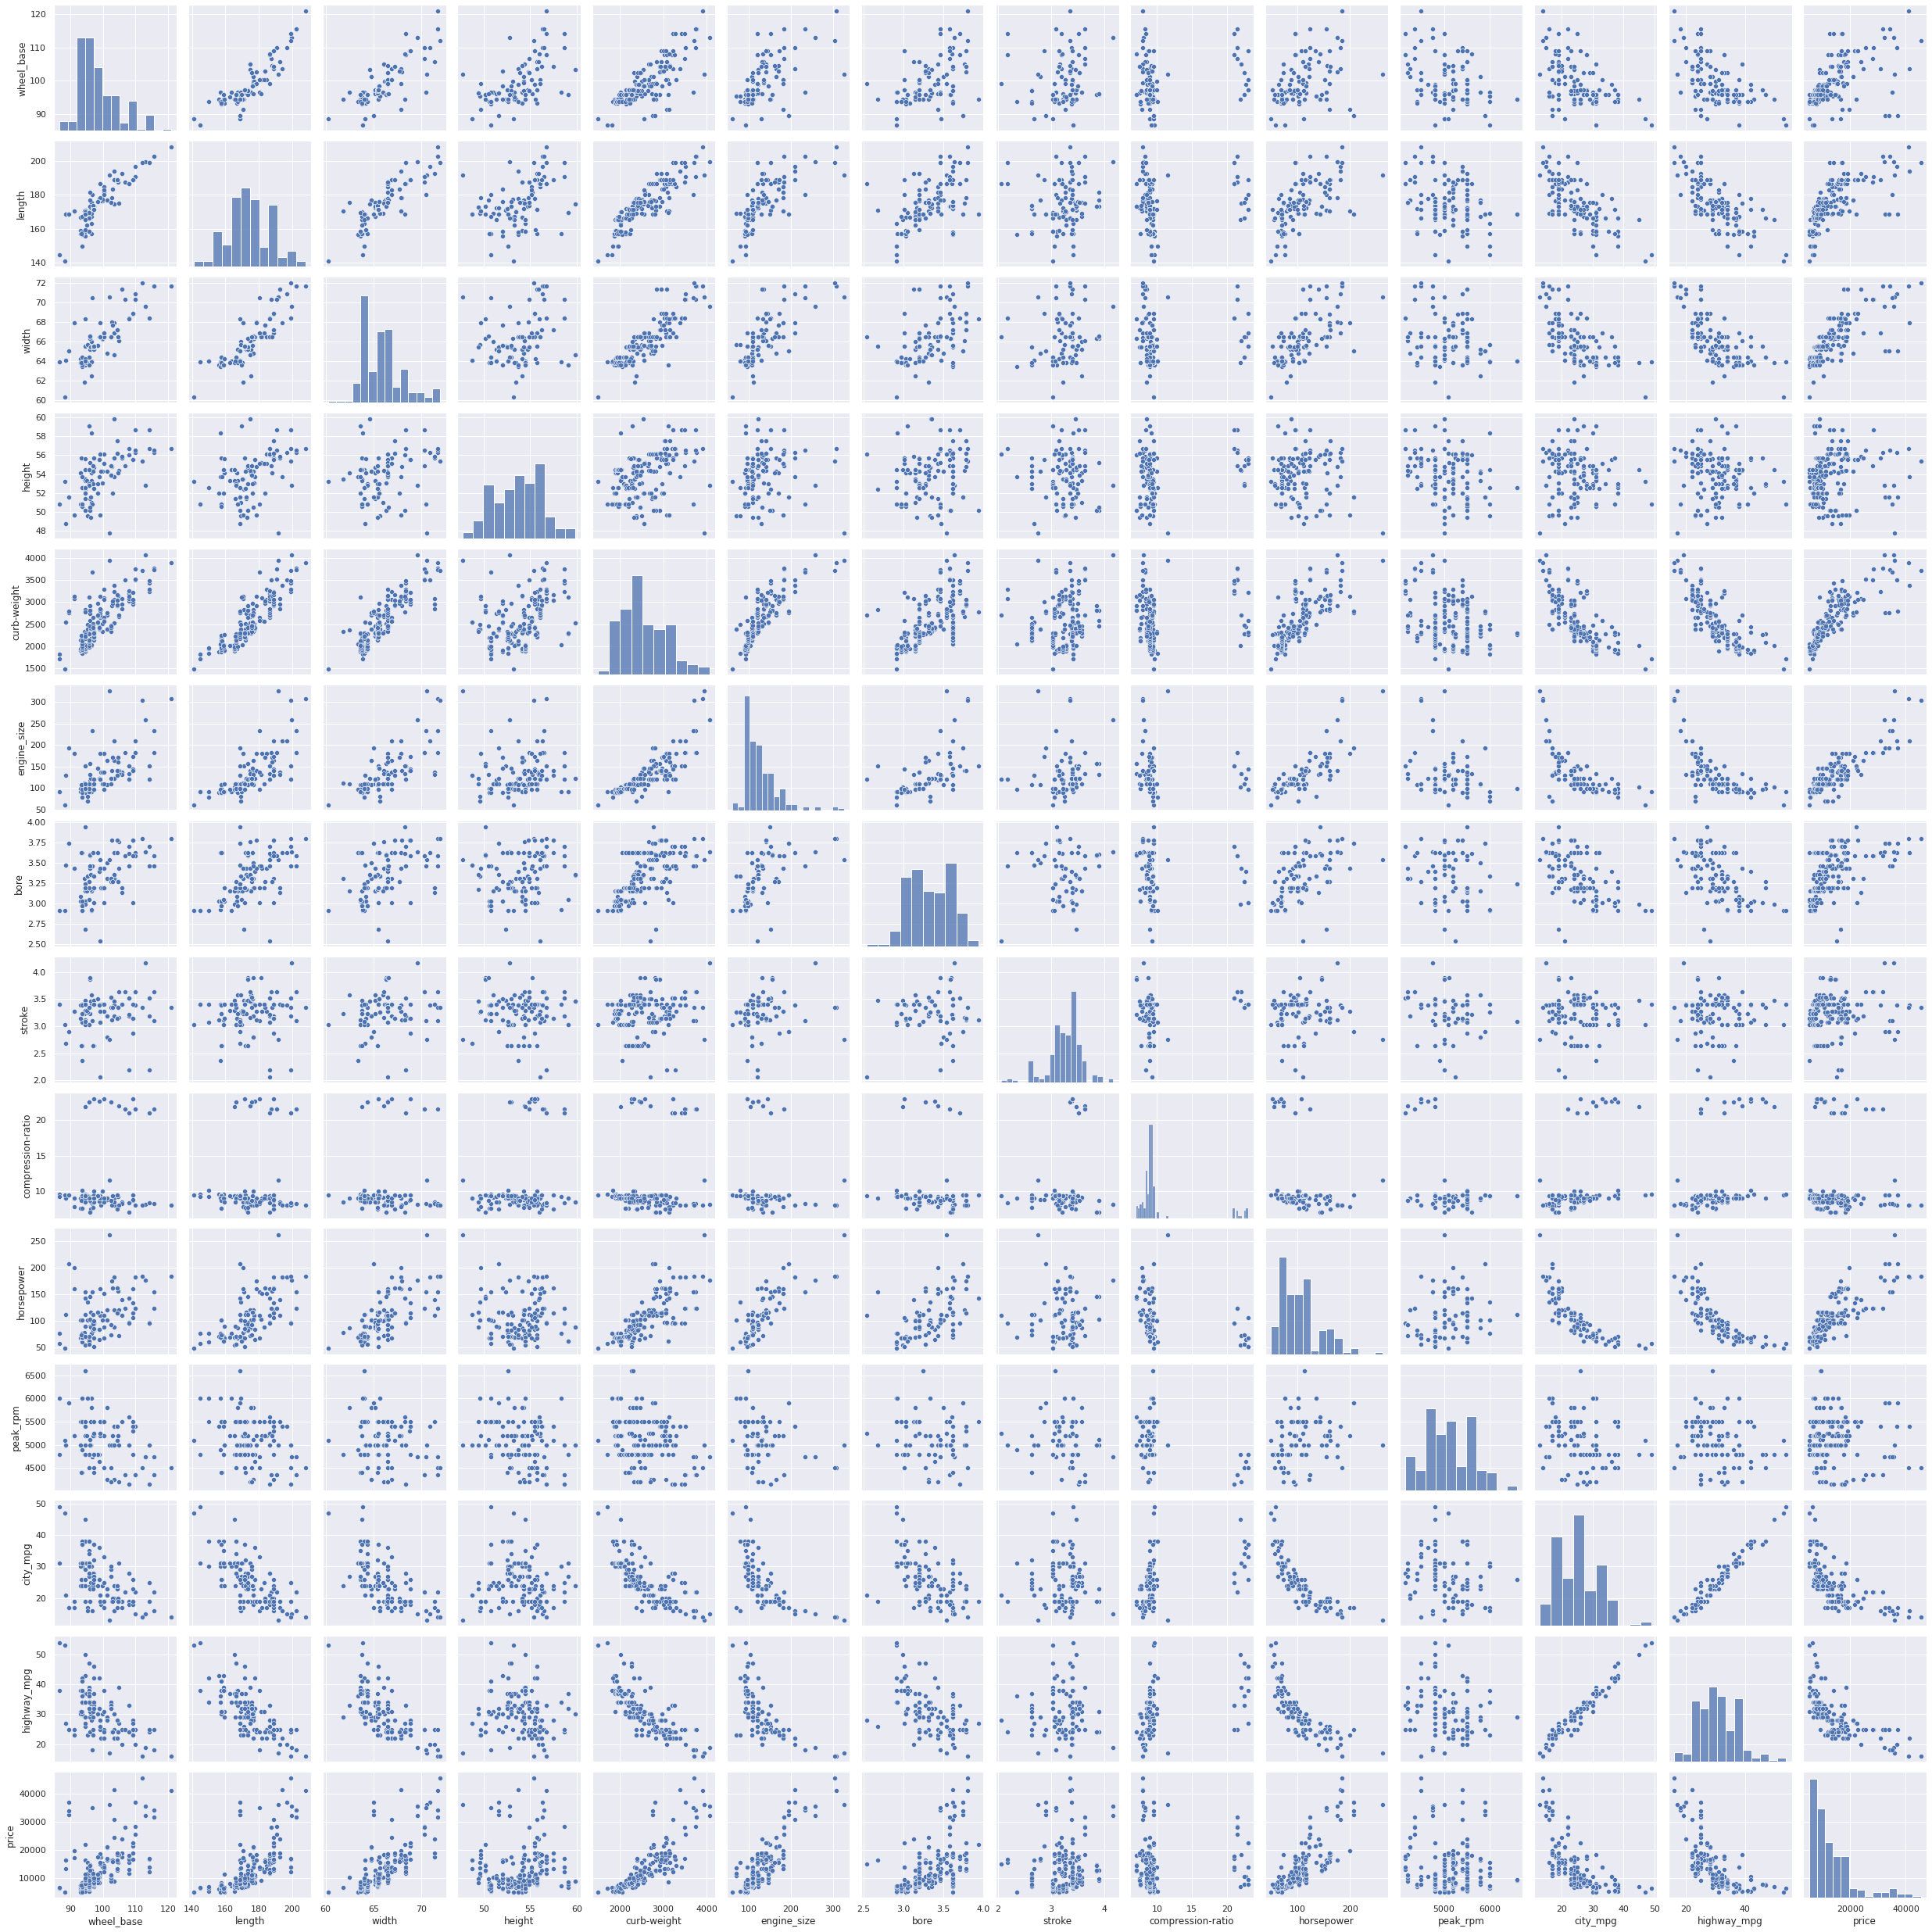

In [106]:
plt.figure(figsize=(20,20))
sns.pairplot(cars_num)
plt.show()

Видно, что с некоторым столбцами у цены есть похожая на линейную корреляция.

Построим heatmap для наглядности.

In [19]:
corr = cars_num.corr()

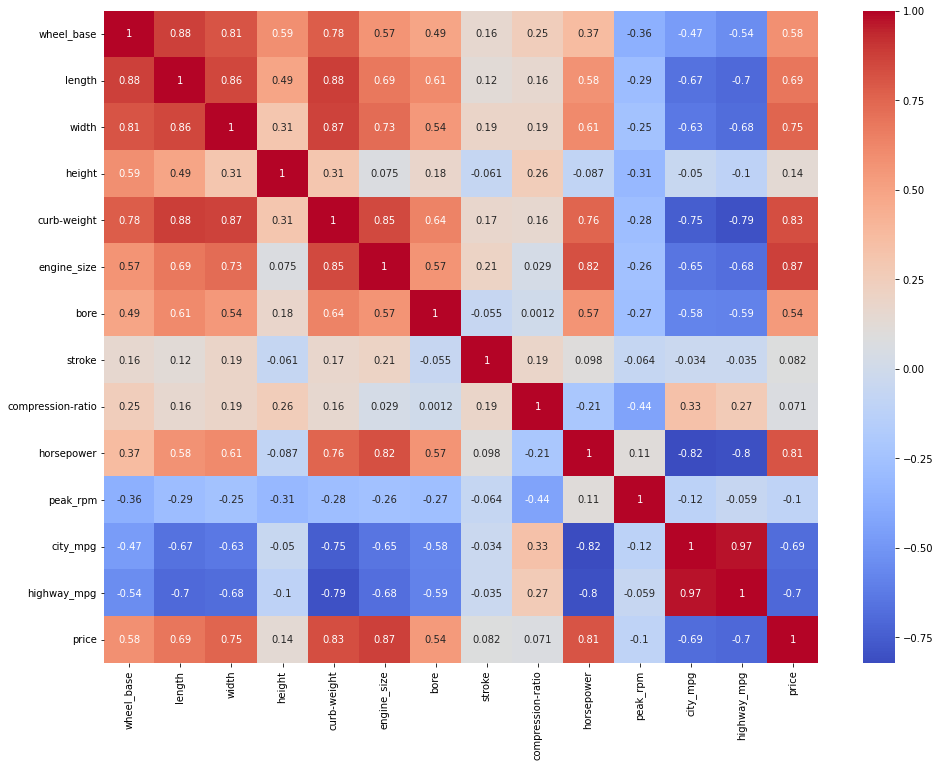

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
sns.set(font_scale = 1)
plt.show()

Коэффициент корреляции c таргетом price меньше |0.1| имеют столбцы stroke, compression_ratio.

Коэффициент корреляции c таргетом price от |0.1| до |0.5| имеют столбцы height, peak_rpm.

Все остальные столбцы сильно коррелируют с таргетом price.

Также можно увидеть, что некоторые столбцы имеют сильную корреляцию между собой,
например, city_mpg и highway_mpg, коэффициент корреляции 0.97.

Наиболее близким к 1 является коэффициент корреляции столбца engine_size с таргетом price.
Посмотрим зависимость поближе.

/home/arcry/envmetr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


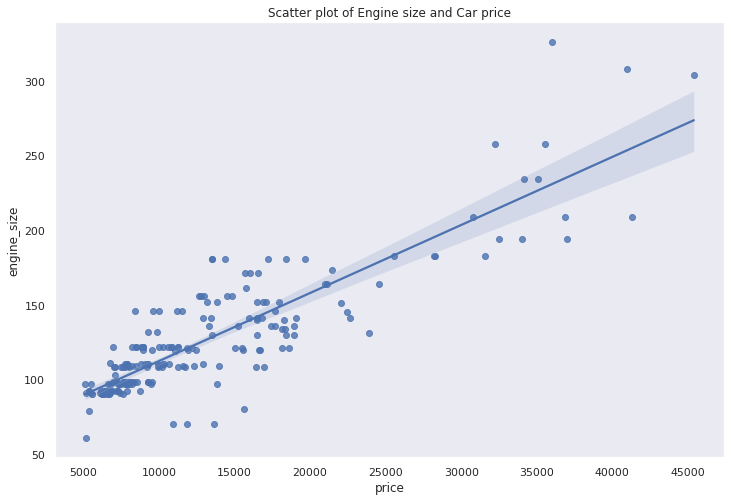

In [21]:
plt.figure(figsize=(12,8))
sns.regplot(cars.price, cars.engine_size)
plt.title('Scatter plot of Engine size and Car price')
plt.xlabel('price')
plt.ylabel('engine_size')
plt.grid()
plt.show()

Чтобы дополнительно подтвердить догадки о линейной зависимости price и engine_size, определим p-value.

In [22]:
corr_coef, p_value = stats.pearsonr(cars.price, cars.engine_size)
print(f'P-value is {p_value}')

P-value is 9.265491622198389e-64


Значение Р-value значительно ниже 0.001, а значит можно с высокой степенью уверенности говорить, что  price и engine_size имеют линейную зависимость.

Посмотрим аналогично зависимость price и bore. Их коэффициент корреляции равен 0.54.

/home/arcry/envmetr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


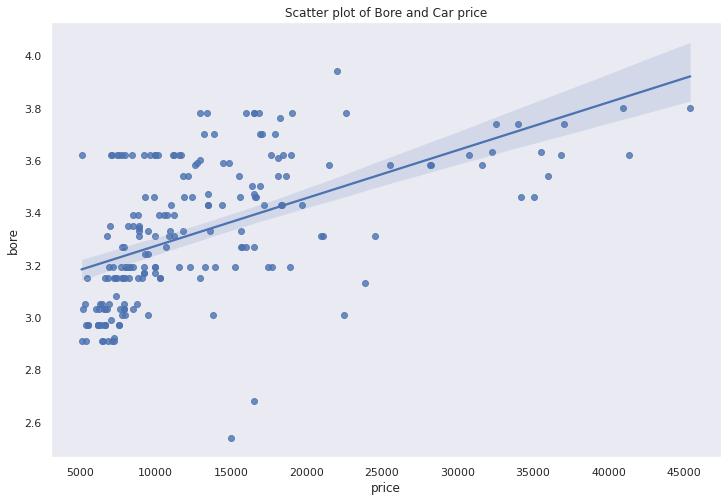

In [23]:
plt.figure(figsize=(12,8))
sns.regplot(cars.price, cars.bore)
plt.title('Scatter plot of Bore and Car price')
plt.xlabel('price')
plt.ylabel('bore')
plt.grid()
plt.show()

In [24]:
corr_coef, p_value = stats.pearsonr(cars.price, cars.bore)
print(f'P-value is {p_value}')

P-value is 8.051208825441245e-17


В этом случае на графике уже слабее прослеживается линейная связь, но P-value
значительно меньше 0.001, что тоже говорит о высокой вероятности линейной взаимосвязи.

# Data prepare 

Необходимо подготовить категориальные данные.

In [107]:
cars_num.drop(columns=['city_mpg', 'stroke', 'compression-ratio', 'peak_rpm', 'height'], inplace=True)

/home/arcry/envmetr/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
cars_cat = cars.select_dtypes(include=['object'])
cars_cat

symboling         make fuel_type aspiration num_of_doors   body_style  \
0           3  alfa-romero       gas        std          two  convertible   
1           3  alfa-romero       gas        std          two  convertible   
2           1  alfa-romero       gas        std          two    hatchback   
3           2         audi       gas        std         four        sedan   
4           2         audi       gas        std         four        sedan   
..        ...          ...       ...        ...          ...          ...   
200        -1        volvo       gas        std         four        sedan   
201        -1        volvo       gas      turbo         four        sedan   
202        -1        volvo       gas        std         four        sedan   
203        -1        volvo    diesel      turbo         four        sedan   
204        -1        volvo       gas      turbo         four        sedan   

    drive_wheels engine_location engine_type num_of_cylinders fuel_system  
0            rwd           front        dohc             four        mpfi  
1            rwd           front        dohc             four        mpfi  
2            rwd           front        ohcv              six        mpfi  
3            fwd           front         ohc             four        mpfi  
4            4wd           front         ohc             five        mpfi  
..           ...             ...         ...              ...         ...  
200          rwd           front         ohc             four        mpfi  
201          rwd           front         ohc             four        mpfi  
202          rwd           front        ohcv              six        mpfi  
203          rwd           front         ohc              six         idi  
204          rwd           front         ohc             four        mpfi  

[201 rows x 11 columns]

Теперь необходимо трансформировать категориальные данные в вид, подходящий для обучения моделей, 
с помощью one-hot encoding.


In [119]:
cars_cat_dumm = pd.get_dummies(cars_cat, drop_first=True)
cars_cat_dumm

symboling_-2  symboling_0  symboling_1  symboling_2  symboling_3  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            1            0            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
..            ...          ...          ...          ...          ...   
200             0            0            0            0            0   
201             0            0            0            0            0   
202             0            0            0            0            0   
203             0            0            0            0            0   
204             0            0            0            0            0   

     make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  ...  \
0            0         0               0           0           0  ...   
1            0         0               0           0           0  ...   
2            0         0               0           0           0  ...   
3            1         0               0           0           0  ...   
4            1         0               0           0           0  ...   
..         ...       ...             ...         ...         ...  ...   
200          0         0               0           0           0  ...   
201          0         0               0           0           0  ...   
202          0         0               0           0           0  ...   
203          0         0               0           0           0  ...   
204          0         0               0           0           0  ...   

     num_of_cylinders_three  num_of_cylinders_twelve  num_of_cylinders_two  \
0                         0                        0                     0   
1                         0                        0                     0   
2                         0                        0                     0   
3                         0                        0                     0   
4                         0                        0                     0   
..                      ...                      ...                   ...   
200                       0                        0                     0   
201                       0                        0                     0   
202                       0                        0                     0   
203                       0                        0                     0   
204                       0                        0                     0   

     fuel_system_2bbl  fuel_system_4bbl  fuel_system_idi  fuel_system_mfi  \
0                   0                 0                0                0   
1                   0                 0                0                0   
2                   0                 0                0                0   
3                   0                 0                0                0   
4                   0                 0                0                0   
..                ...               ...              ...              ...   
200                 0                 0                0                0   
201                 0                 0                0                0   
202                 0                 0                0                0   
203                 0                 0                1                0   
204                 0                 0                0                0   

     fuel_system_mpfi  fuel_system_spdi  fuel_system_spfi  
0                   1                 0                 0  
1                   1                 0                 0  
2                   1                 0                 0  
3                   1                 0                 0  
4                   1                 0                 0  
..                ...        

Разделим данные на Х и y.

Объединим количественные данные с категориальными, удалив из них таргет price - X.

In [230]:
X = pd.concat([cars_num.iloc[:,:-1], cars_cat_dumm], axis=1)
y = cars_num.iloc[:,-1]

Разделим данные на train и test.

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормализуем данные

In [232]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Build models

Так как при предварительном анализе было видно, что многие из количественных 
данных почти линейно связаны с таргетом, воспользуемся линейными моделями регрессии.

In [233]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae

Попробуем применить модель без количества столбцов.

In [234]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
y_pred_train = lr.predict(X_train_sc)
print('test', mse(y_test, y_pred))
print('train', mse(y_train, y_pred_train))

test 4.742855455455486e+31
train 1442928.0350374565


Попробуем использовать кросс-валидацию для модели линейной регрессии с L2 регуляризацией.

In [235]:
from sklearn.model_selection import GridSearchCV, KFold

In [271]:
kf = KFold(shuffle=True, random_state=42)
params = {'alpha': np.logspace(0.1, 1, 30)}
ridge = Ridge(max_iter=50000)
reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=kf, return_train_score=True)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_test_sc)
y_pred_train = reg.predict(X_train_sc)
print('test', mse(y_test, y_pred))
print('train', mse(y_train, y_pred_train))

test 9125550.67296802
train 1949818.0903694953


Результат стал немного лучше.

Уменьшим размерность с помощью метода PCA

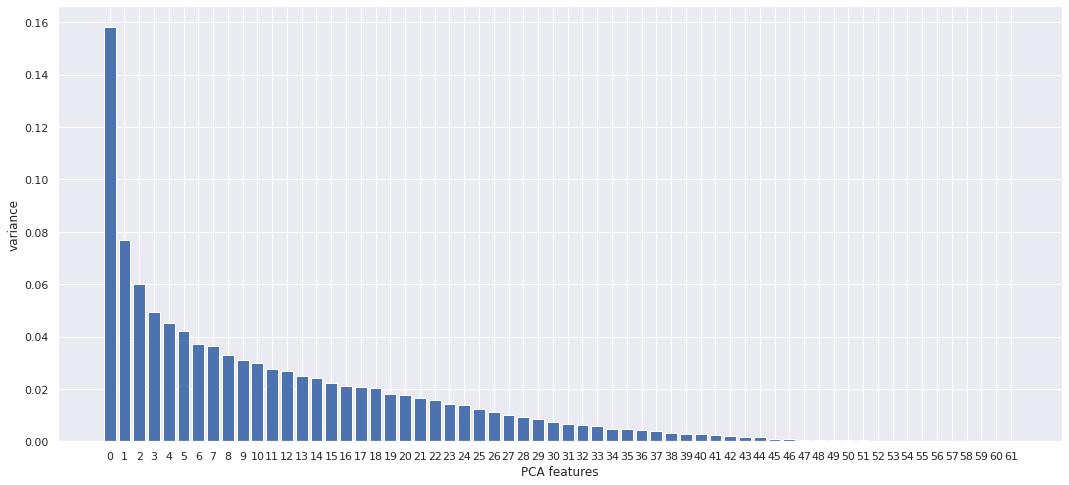

In [272]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train_sc)

plt.figure(figsize=(18, 8))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

На графике видно вклад каждой компоненты в общую дисперсию. 

In [273]:
n = pca.n_components_

In [274]:
sum = 0
for i, d in enumerate(pca.explained_variance_ratio_):
    sum+= d
    if sum > 0.999:
        break
print("Need components %d" % (i+1))

Need components 52


Построим зависимость r2_score от количества компонент

/home/arcry/envmetr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/arcry/envmetr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


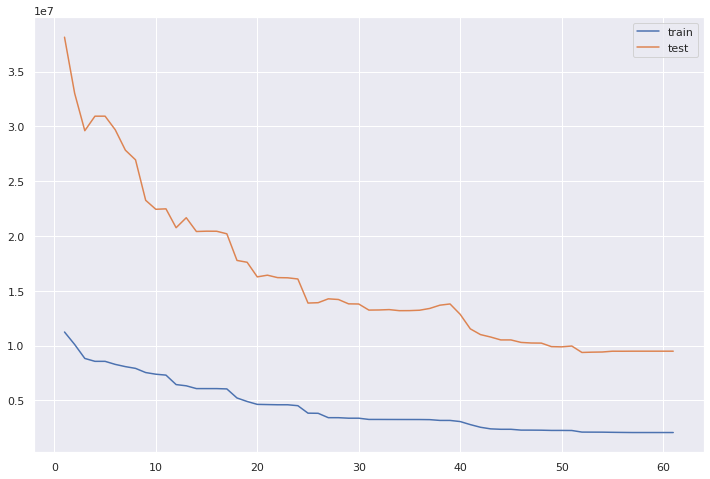

In [277]:
r2_train = []
r2_test = []

for i in range(1, n):
    pca = PCA(n_components=i, random_state=42)
    X_train_sc_pca = pca.fit_transform(X_train_sc)
    X_test_sc_pca = pca.transform(X_test_sc)

    lr = Ridge(alpha=12.1, random_state=42)
    lr.fit(X_train_sc_pca, y_train)
    y_pred = lr.predict(X_test_sc_pca)
    y_pred_train = lr.predict(X_train_sc_pca)
    r2_test.append(mse(y_test, y_pred))
    r2_train.append(mse(y_train, y_pred_train))

plt.figure(figsize=(12,8))
sns.lineplot(range(1, n), r2_train, label='train')
sns.lineplot(range(1, n), r2_test, label='test')
plt.legend()
plt.show()

In [278]:
best_n_comp = np.argmin(np.array(r2_test))
best_n_comp

51

Заметно, что только около 55 компонент влияют на значение метрики.

In [279]:
pca = PCA(n_components=52, random_state=42)
X_train_sc_pca = pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

lr = Ridge(alpha=8.67, random_state=42)
lr.fit(X_train_sc_pca, y_train)
y_pred = lr.predict(X_test_sc_pca)
y_pred_train = lr.predict(X_train_sc_pca)
print('test',mse(y_test, y_pred))
print('train', mse(y_train, y_pred_train))

test 8961599.561764402
train 2002996.7115286284


Результат еще немного увеличился.

 В качестве альтернативы попробуем CatBoostRegressor

In [243]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=42)
params = {'iterations': [100, 250, 350], 
          'learning_rate': [0.01, 0.1, 0.2], 
          'depth': [1, 2, 3]
         }
reg_cat =  GridSearchCV(cat, params, cv=kf, scoring='neg_mean_absolute_error')
reg_cat.fit(X_train_sc, y_train, verbose=False)
y_pred = reg_cat.predict(X_test_sc)
y_pred_train = reg_cat.predict(X_train_sc)
print('test', mse(y_test, y_pred))
print('train', mse(y_train, y_pred_train))

test 6531822.004783653
train 1109277.3253299422


# Results 

1. Использовались линейная регрессии и линейная регрессии с регуляризацией L2, 
данных мало, большая вероятность переобучиться.
2. Применение PCA и уменьшение размерности позволило улучшить результаты работы 
линейной регрессии с регуляризацией L2.
3. Использовался градиентный бустинг был получен результат выше, но градиентный 
бустинг на малом объеме данных больше склонен к переобучению.
4. Результаты:
|       Модель            |   MSE   |
|------------------------:|:--------|
| LinearRegression        | 4.0e31  |
| RidgeRegression         | 9.13e6  |
| PCA + RidgeRegression   | 8.96e6  |
| CatBoostClassifier      | 6.53e6  |
5. При больше количестве данных была бы точнее видна корреляция фичей. 
Скорее всего можно было бы сильнее уменьшить количество размерностей. 
Вероятность переобучения бы уменьшилась.
При большем количестве времени я бы попробовал обучить другие модели (например, деревья, простые нейросетки),
попробовал бы улучшить модель бустинга, использовал бы другие методы понижения размерностей. 
Провел бы более детальный EDA, посмотрел бы распределения вероятностей различных параметров, устранил бы выбросы.
Провел бы анализ категориальных данных.